<a href="https://colab.research.google.com/github/EfrainHernandezCortes/EDP2/blob/main/M%C3%A9todo_de_Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Necesario para 3D
from matplotlib import cm #Colormap
from tabulate import tabulate #Para hacer tablas

In [73]:
def f(x):
  return 1-4*(x-0.5)**2

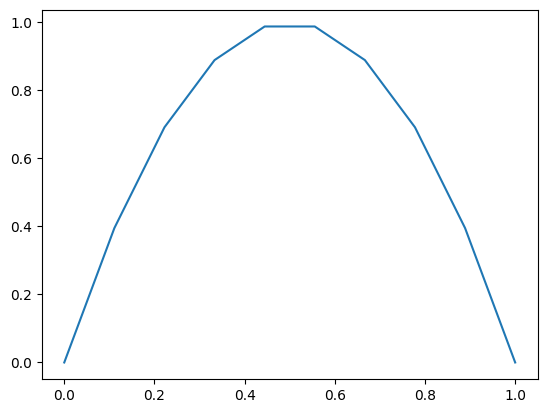

In [74]:
x = np.linspace(0,1,10)
plt.plot(x, f(x))

In [75]:
def tridiagonal(n, a, b):
   return sp.Matrix ([
     [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
     for i in range(n)
   ])

In [76]:
r = 1

In [77]:
A = tridiagonal(9, 2 + 2*r, -r)

In [78]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [79]:
B = tridiagonal(9, 2 - 2*r, r)

In [80]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [81]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [82]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [83]:
def crank_nicolson(A, B, b, j):
  b_1 = B*b                  # Mismo paso inicial
  S = []                     # Aquí guardaremos cada solución

  for i in range(j):
    sol = A.LUsolve(b_1)     # u^{n+1}
    S.append(sol.T)          # Guardar fila (como vector renglón)
    b_1 = B*sol              #Preparar siguiente paso
  #Convertir lista de vectores sympy a una matriz sympy
  return sp.Matrix(S)        #Matriz resultado

In [84]:
j = 50 #Número de pasos en el tiempo

In [85]:
U = crank_nicolson(A, B, b, j)

Ejercicio 1.

In [86]:
data = [list(U.row(i)) for i in range(5)]
print(tabulate(data, tablefmt = "grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

El valor de t al que llega es t=0.05

In [93]:
def u_xt(x, t, terms=200):
    s = 0.0
    for m in range(1, terms+1):
        n = 2*m - 1
        b = 32 / (np.pi**3 * n**3)
        s += b * np.sin(n*np.pi*x) * np.exp(-n**2 * np.pi**2 * t)
    return s

# Valores de x y t
xs = np.arange(0.1, 0.51, 0.1)
ts = np.arange(0.01, 0.051, 0.01)

# Construcción de tabla
table = []
for t in ts:
    row = [t]
    for x in xs:
        row.append(u_xt(x, t))
    table.append(row)

# Encabezados
headers = ["t"] + [f"x={x:.1f}" for x in xs]
print("Solución real: ")
# Mostrar tabla
print(tabulate(table, headers=headers, floatfmt=".6f"))
print("Solución numérica: ")
data = [list(U.row(i)) for i in range(5)]
print(tabulate(data, tablefmt = "grid"))


Solución real: 
       t     x=0.1     x=0.2     x=0.3     x=0.4     x=0.5
--------  --------  --------  --------  --------  --------
0.010000  0.302389  0.564543  0.760642  0.880061  0.920008
0.020000  0.267085  0.504110  0.687320  0.801911  0.840768
0.030000  0.239346  0.453690  0.621784  0.728427  0.764902
0.040000  0.215783  0.409799  0.562945  0.660741  0.694327
0.050000  0.195065  0.370771  0.509872  0.598962  0.629614
Solución numérica: 
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 

In [88]:
U_np = np.array(U.tolist(), dtype = float)

In [89]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.05, j) #Debe coincidir con el tamaño de j por k(tiempo)
X, Y = np.meshgrid(x, y)

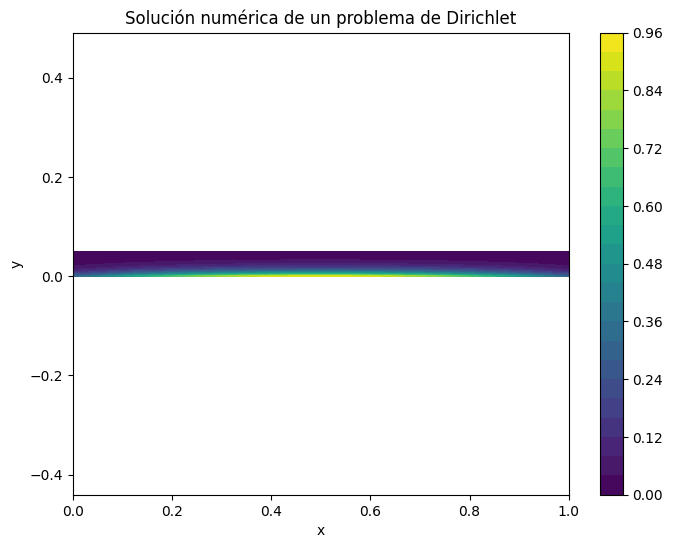

In [90]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

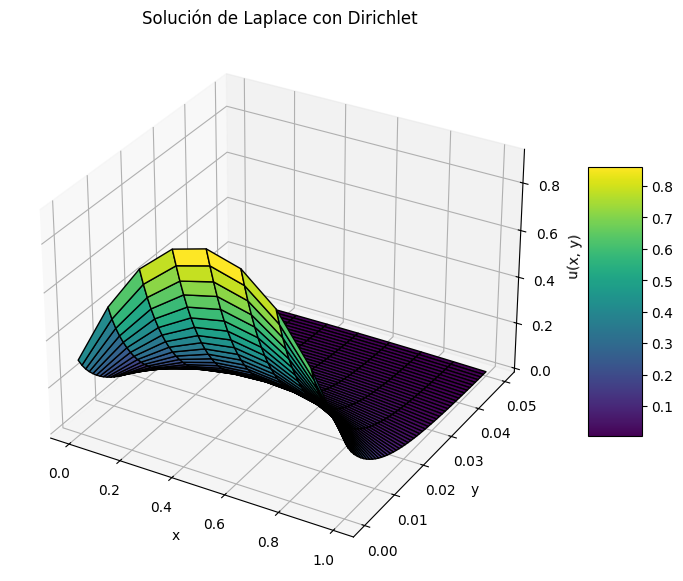

In [91]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()